<a href="https://colab.research.google.com/github/juliaviolet/Python_Options/blob/main/Black_Scholes_Merton_Options_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Black-Scholes-Merton (BSM) model** is a mathematical model that economists Fisher Black, Myron Scholes, and Robert Merton developed for pricing financial derivatives, specifically options. The BSM model is based on the assumption that financial markets are efficient, and the underlying asset's price, such as a stock, follows a geometric Brownian motion with constant volatility. This continuous-time stochastic process is described by the equation:

$
dS_t = \mu S_t dt + \sigma S_t dW_t
$

where $dS_t$ is the change in the asset price, $\mu$ is the expected return (drift term), $\sigma$ is the standard deviation of returns (diffusion term), and $dW_t$ is a Wiener process or Brownian motion.

The derivation of the Black-Scholes-Merton formula involves using **Ito's Lemma**, a fundamental result in stochastic calculus. Ito's Lemma allows us to find the differential of a function of a stochastic process and is an extension of the chain rule from ordinary calculus to the context of stochastic calculus.

Consider a function $f(t, X_t)$ where $X_t$ is a stochastic process that follows geometric Brownian motion:

$
dX_t = \mu X_t dt + \sigma X_t dW_t
$

where $dW_t$ is a Wiener process, and $\mu$ and $\sigma$ are constants.

We want to find the differential $df(t, X_t)$. In ordinary calculus, we would apply the chain rule to get:

$
df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial X} dX
$

However, in stochastic calculus, due to the presence of the $dW_t$ term (which has quadratic variation), there is an additional second order term. This leads us to Ito's lemma:

$
df(t, X_t) = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial X} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial X^2} (dX_t)^2
$

Substituting the expression for $dX_t$ from the geometric Brownian motion into this equation, we get:

$
df(t, X_t) = \left( \frac{\partial f}{\partial t} + \mu X_t \frac{\partial f}{\partial X} + \frac{1}{2} \sigma^2 X_t^2 \frac{\partial^2 f}{\partial X^2} \right) dt + \sigma X_t \frac{\partial f}{\partial X} dW_t
$

This is the statement of Ito's lemma for a one-dimensional Ito process. It's an essential tool for deriving the Black-Scholes-Merton formula and many other results in mathematical finance.

By using Ito's Lemma, a portfolio is constructed that is instantaneously risk-free. The portfolio consists of a long position in the derivative and a short position in $\Delta$ units of the underlying asset, where $\Delta$ is chosen to eliminate the risk. By designating the portfolio as risk-free, the portfolio's expected return should be the risk-free rate, leading to the Black-Scholes differential equation.

The Black-Scholes differential equation, a partial differential equation, describes the price of the option over time:

$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$

where:
- $V$ is the price of the option,
- $S$ is the price of the underlying asset,
- $t$ is the time,
- $r$ is the risk-free rate, and
- $\sigma$ is the volatility of the underlying asset.

The boundary condition for a European call option at expiry is that the payoff is equal to the maximum of zero or the difference between the stock price and the strike price. For a put option, the payoff at expiry is the maximum of zero or the strike price minus the stock price. These conditions are mathematically represented as:

$
V(S, T) = \max(0, S - K) \quad \text{for a call option}
$

$
V(S, T) = \max(0, K - S) \quad \text{for a put option}
$

where $K$ is the strike price, and $T$ is the time to maturity.

Solving the Black-Scholes differential equation with these boundary conditions involves methods from mathematical finance and stochastic calculus, including the use of Ito's Lemma and risk-neutral valuation.

The solution to this equation leads to the Black-Scholes-Merton formula for the price of a European call and put options:

For a call option:

$
C(S_t, t) = S_t \cdot N(d_1) - X \cdot e^{-r(T - t)} \cdot N(d_2)
$

For a put option:

$
P(S_t, t) = X \cdot e^{-r(T - t)} \cdot N(-d_2) - S_t \cdot N(-d_1)
$

where:

- $C(S_t, t)$ and $P(S_t, t)$ are the prices of the call and put options, respectively.
- $S_t$ is the price of the underlying asset.
- $X$ is the strike price.
- $T$ is the time to maturity.
- $r$ is the risk-free rate.
- $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.

And:

$
d_1 = \frac{1}{\sigma \sqrt{T - t}} \left[ \ln\left(\frac{S_t}{X}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t) \right]
$

$
d_2 = d_1 - \sigma \sqrt{T - t}
$

The Black-Scholes-Merton model also has a characteristic function, which is a complex-valued function that encodes the probability distribution of a random variable. The characteristic function of the log-return under the Black-Scholes-Merton model is given by:

$$
\phi(u) = \exp\left\{iu\left(\ln(S_0) + (r - \frac{1}{2}\sigma^2)T\right) - \frac{1}{2}\sigma^2u^2T\right\}
$$

where:

- $\phi(u)$ is the characteristic function,
- $u$ is a complex number,
- $S_0$ is the initial price of the underlying asset,
- $r$ is the risk-free rate,
- $\sigma$ is the volatility of the underlying asset,
- $T$ is the time to maturity.

This characteristic function is derived from the assumption that the log returns of the underlying asset follow a normal distribution, which is a key assumption of the Black-Scholes-Merton model. The characteristic function is a powerful tool in mathematical finance as it allows for the computation of option prices and risk management quantities using Fourier transform methods.


 This code defines a function called **generate_asset_paths** that simulates multiple asset price paths using the Monte Carlo method. The code then uses this function to generate asset paths based on the provided parameters and stores the result in a DataFrame for easier viewing.
The asset_paths array has N + 1 rows and n_sims columns. Each row will represent the asset price at a particular time step, and each column will represent a different simulation.

**Simulate asset paths using the Monte Carlo method:** For each time step **t** from 1 to **N**, the function generates a set of random numbers **brownian** from a standard normal distribution using **np.random.standard_normal(n_sims)**. Then, it calculates the new asset prices for all simulations at time **t** based on the previous asset prices at **t-1** and the random **brownian** values. The formula used here is a simplified version of the geometric Brownian motion formula used in financial modeling.It returns the **asset_paths** array.

In [1]:
import numpy as np
import pandas as pd

def generate_asset_paths(S0: float, r: float, sigma: float, T: float, dt: float, n_sims: int, seed: int = 42) -> np.ndarray:
    '''
    Generates asset paths for a given initial asset price S0, risk-free rate r,
    volatility sigma, total time T, time step dt, and number of simulations n_sims.
    '''
    # set the random seed for reproducibility
    np.random.seed(seed)

    # number of time steps
    N = int(T / dt) + 1  # Number of steps should be an integer, so using int() to round the value up if necessary.

    # array to store asset paths
    asset_paths = np.zeros((N, n_sims))

    # initialize first row with initial asset price
    asset_paths[0] = S0

    # simulate asset paths using the Monte Carlo Method
    for t in range(1, N):
        brownian = np.random.standard_normal(n_sims)
        asset_paths[t] = asset_paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * brownian)

    return asset_paths

# Define your parameters
S0 = 12500.47  # initial asset price
r = 0.02358        # risk-free rate
sigma = 0.2359  # volatility
T = 1.0         # total time
dt = 0.01       # time step
n_sims = 10000  # number of simulations

# generate asset paths
asset_paths = generate_asset_paths(S0, r, sigma, T, dt, n_sims)

# convert to DataFrame for easier viewing
df_asset_paths = pd.DataFrame(asset_paths)

<ipython-input-2-4decf38ef5af>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


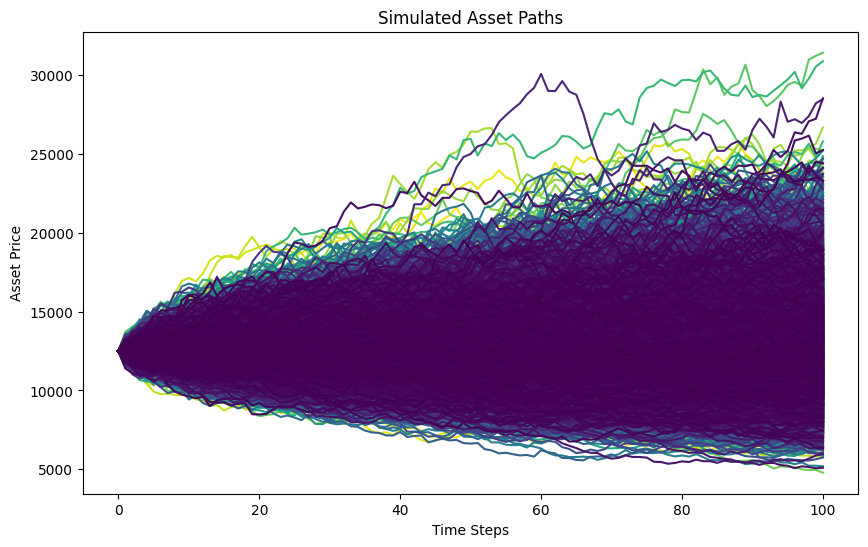

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_simulated_paths(df_asset_paths: pd.DataFrame, n_sims: int) -> None:
    """
    Plot each simulated asset path.

    Parameters:
        df_asset_paths (pd.DataFrame): DataFrame containing simulated asset paths.
        n_sims (int): Number of simulations.

    Returns:
        None
    """
    # Set the colormap to 'viridis'
    cmap = cm.get_cmap('viridis')

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Generate colors
    colors = cmap(np.linspace(1, 0, n_sims))

    # Plot each simulated path
    for i in range(n_sims):
        plt.plot(df_asset_paths.index, df_asset_paths[i], color=colors[i])

    plt.title('Simulated Asset Paths')
    plt.xlabel('Time Steps')
    plt.ylabel('Asset Price')
    plt.show()

# Call the function to plot the simulated paths
plot_simulated_paths(df_asset_paths, n_sims)

The **Carr-Madan Fast Fourier Transform (FFT) method**, introduced by Peter Carr and Dilip Madan, is an efficient numerical method for valuing options based on the Black-Scholes-Merton (BSM) model. This method computes prices for a large number of strike prices by applying the FFT to a modification of the characteristic function implied by the BSM model.

The key insight of the Carr-Madan method is the ability to express the price of a European call option as an inverse Fourier transform of a modified version of the characteristic function of the log asset price. This modification, involving the introduction of a damping factor, ensures quick decay of the integrand in the inverse Fourier transform, making the numerical integration more stable and accurate.

The Carr-Madan FFT method derives from the risk-neutral valuation formula, which states that the price of a derivative is the expected value of its future payoff under the risk-neutral measure, discounted at the risk-free rate. The method proves particularly useful in situations where a large number of option prices need to be computed due to its speed and accuracy.

Here are the steps of the Carr-Madan FFT method:

**Step 1: Setup**

Set up the parameters for the FFT. These include the number of points for the FFT (usually a power of 2, such as 256 or 512), the size of the step in the log-strike space (denoted by \(\Delta\)), and the maximum log-strike.

**Step 2: Define the characteristic function**

The characteristic function of the log asset price under the risk-neutral measure in the BSM model is given by:

$
\phi(u; T) = \exp\left(iu\left(\ln(S_0) + \left(r-\frac{\sigma^2}{2}\right)T\right) - \frac{\sigma^2u^2T}{2}\right)
$

where $T$ is the time to maturity, $S_0$ is the initial asset price, $r$ is the risk-free rate, $\sigma$ is the volatility, and $i$ is the imaginary unit.

**Step 3: Define the modified characteristic function**

Introduce a damping factor into the characteristic function, resulting in the modified characteristic function. The damping factor is introduced to ensure quick decay of the integrand in the inverse Fourier transform, making the numerical integration more stable and accurate.

$
\phi_{\text{mod}}(u; T) = e^{iub}\phi(u-i; T)
$

where \(b\) is the damping factor.

**Step 4: Define the Fourier transform**

Define the Fourier transform of the payoff function of the option. In the case of a European call option, this is given by:

$
C(k) = e^{-rT}\left(e^{kb}\int_0^{\infty} e^{-iu(k-i\Delta)}\phi_{\text{mod}}(u; T) du\right)
$

where \(k\) is the log strike price.

**Step 5: Compute the inverse Fourier transform**

Use the Fast Fourier Transform (FFT) to compute the inverse Fourier transform of the option price for a range of log strike prices.

**Step 6: Obtain option prices**

The output of the FFT is a complex number. The real part gives the option price for a corresponding strike price.

Implementing this method in practice may require additional steps and considerations, such as handling potential numerical instabilities and choosing appropriate parameters.

#### The code in the focal cell is a Python implementation of the **Black-Scholes-Merton (BSM)** model for option pricing using the **Fast Fourier Transform (FFT)** method. The BSM model is a widely used mathematical model for valuing European-style options. The code reads option data from a CSV file, applies the BSM model using FFT to compute option prices, and then adds the calculated option prices as a new column in the DataFrame.

Let's go through the code step by step:

**Importing necessary libraries:**

**numpy (as np)**: a library for numerical computations in Python.
**pandas (as pd)**: a powerful library for data manipulation and analysis.
**fft from scipy.fftpack**: a function from SciPy for Fast Fourier Transform.

**Defining the characteristic function for the BSM model:**

**BSM_characteristic_function:** This function takes Fourier transform variable **v**, initial stock price **x0**, time to expiration **T**, risk-free rate **r**, and stock volatility **sigma** as inputs and returns the characteristic function value for the BSM model.

**Defining the BSM option pricing function using FFT:**

**BSM_option_value_FFT:** This function calculates the option prices using the BSM model with the FFT method.
It takes the initial stock price **S0**, option's strike price **K**, time to expiration **T**, risk-free rate **r**, stock volatility **sigma**, and option type (**'call'** or **'put'**) as inputs.
The function performs several calculations to prepare the input data for the FFT method, applies FFT, and computes the option value.

**Applying Fourier pricing to each row of the DataFrame:**

**price_options:** This function applies the **BSM_option_value_FFT** function to each row of the DataFrame containing option data.
It calculates the time to expiration **T**, risk-free rate **r**, and implied volatility **sigma** from the given option data in each row.
Then, it calls the BSM_option_value_FFT function to compute the option price based on the option type (**'call'** or **'put'**).

**Loading the data and computing option prices:**

The code loads option data from the CSV file **'tr_option_data.csv'** into a DataFrame **df**.
It then applies the **price_options** function to each row of the DataFrame and stores the calculated option prices in a new column called 'FOURIER_PRICE'.

**Printing the DataFrame:**

Finally, the code prints the DataFrame df with the added 'FOURIER_PRICE' column.

**alpha = 1.5:** This is a damping parameter used in the Carr-Madan method, which is an approach to option pricing that uses Fourier transforms. The damping factor is used to ensure that the Fourier integral exists and to shift the integration path in the complex plane. The specific choice of alpha = 1.5 is somewhat arbitrary and is based on the needs of the algorithm and the specific problem at hand. It's typically chosen to make the algorithm perform well in practice.

**N = g * 4096:** The N variable represents the number of discrete points used in the FFT calculation. The specific choice of 4096 is related to the fact that FFT algorithms are most efficient when the number of points is a power of 2.

**eps = (g * 150.) - 1:** eps is related to the step size in the discretization of the Fourier integral.

The variable **g** in the code above is used as a scaling factor to increase the accuracy of the Fast Fourier Transform (FFT) method used in the **BSM_option_value_FFT function**. It is used to scale N and eps. **N** is the number of discrete points in the FFT calculation, and **eps** is related to the step size in the discretization of the Fourier integral. In this code, N is set to g * 4096 and eps is set to (g * 150.) ** -1. By increasing g, the number of discretization points N increases and the step size eps decreases, which could potentially increase the accuracy of the FFT method at the expense of computational resources.

However, in this specific code, g is set to 1 and never changed, so it's effectively not altering the computations in any way. It could be used in sensitivity analysis or other scenarios where one might want to adjust the precision of the FFT calculations.

In [3]:
import time
import numpy as np
import pandas as pd
from scipy.fftpack import fft


def BSM_characteristic_function(v: float, x0: float, T: float, r: float, sigma: float) -> complex:
    """
    Calculate the characteristic function for the Black-Scholes-Merton (BSM) model.

    Parameters:
        v (float): The Fourier transform variable.
        x0 (float): The initial stock price.
        T (float): Time to expiration in years.
        r (float): Risk-free rate.
        sigma (float): Volatility of the stock.

    Returns:
        complex: The value of the characteristic function.
    """
    cf_value = np.exp(((x0 / T + r - 0.5 * sigma ** 2) * 1j * v - 0.5 * sigma ** 2 * v ** 2) * T)
    return cf_value


def BSM_option_value_FFT(S0: float, K: float, T: float, r: float, sigma: float, option_type: str) -> float:
    """
    Calculate the option prices using the Black-Scholes-Merton (BSM) model with the Fast Fourier Transform (FFT).

    Parameters:
        S0 (float): The initial stock price.
        K (float): The option's strike price.
        T (float): Time to expiration in years.
        r (float): Risk-free rate.
        sigma (float): Volatility of the stock.
        option_type (str): Type of the option ('call' or 'put').

    Returns:
        float: The option value calculated using the FFT method.
    """
    k = np.log(K / S0)
    x0 = np.log(S0 / S0)
    g = 1  # factor to increase accuracy
    N = g * 4096 # Number of discrete points in the FFT calculation, Scaling factor to increase accuracy of the FFT calculation
    eps = (g * 150.) ** -1 # Step size in the discretization of the Fourier integral
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    delt = np.zeros(N, dtype=float)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3

    alpha = 1.5 # Damping parameter for the Carr-Madan method in option pricing
    v = vo - (alpha + 1) * 1j
    modcharFunc = np.exp(-r * T) * (BSM_characteristic_function(v, x0, T, r, sigma) / (alpha ** 2 + alpha - vo ** 2 + 1j * (2 * alpha + 1) * vo))
    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
    payoff = fft(FFTFunc)  # Removed .real here
    OptionValueM = np.exp(-alpha * k) / np.pi * payoff

    pos = int((k + b) / eps)
    OptionValue = np.real(OptionValueM[pos]) * S0  # Used np.real() here

    if option_type == 'call':
        return max(OptionValue, 0)
    elif option_type == 'put':
        return max(OptionValue - S0 + np.exp(-r * T) * K, 0)

def price_options(row: pd.Series) -> float:
    """
    Apply Fourier pricing to each row of the DataFrame to compute option prices.

    Parameters:
        row (pd.Series): A row of the DataFrame containing option data.

    Returns:
        float: The option price.
    """
    t1 = pd.to_datetime(row['CF_DATE'])
    t2 = pd.to_datetime(row['EXPIR_DATE'])
    T = (t2 - t1).days / 365.0  # convert difference in days to years

    S0 = row['CF_CLOSE']
    K = row['STRIKE_PRC']
    r = 0.02  # risk-free rate
    sigma = row['IMP_VOLT'] / 100  # implied volatility, converted from percentage to fraction

    if np.isnan(S0) or np.isnan(K) or np.isnan(T) or np.isnan(sigma):
        return np.nan
    if np.isinf(S0) or np.isinf(K) or np.isinf(T) or np.isinf(sigma):
        return np.nan

    if row['PUTCALLIND'] == 'CALL':
        return BSM_option_value_FFT(S0, K, T, r, sigma, 'call')
    else:  # If it's not a call, it's a put
        return BSM_option_value_FFT(S0, K, T, r, sigma, 'put')  # use the put pricing function here


# Load the data
start_time = time.time()

df = pd.read_csv('tr_option_data.csv')

# Compute the option prices
df['FOURIER_PRICE'] = df.apply(price_options, axis=1)

end_time = time.time()

print(df)
print(f"Execution time: {end_time - start_time} seconds")

     Unnamed: 0       Instrument     CF_DATE  EXPIR_DATE PUTCALLIND  \
0             0           .GDAXI  2018-04-27         NaN        NaN   
1             1  GDAX105000G8.EX  2018-04-27  2018-07-20       CALL   
2             2  GDAX105000S8.EX  2018-04-27  2018-07-20       PUT    
3             3  GDAX108000G8.EX  2018-04-27  2018-07-20       CALL   
4             4  GDAX108000S8.EX  2018-04-26  2018-07-20       PUT    
..          ...              ...         ...         ...        ...   
110         110  GDAX137000S8.EX  2018-04-27  2018-07-20       PUT    
111         111  GDAX137500G8.EX  2018-04-27  2018-07-20       CALL   
112         112  GDAX137500S8.EX  2018-04-27  2018-07-20       PUT    
113         113  GDAX138000G8.EX  2018-04-27  2018-07-20       CALL   
114         114  GDAX138000S8.EX  2018-04-27  2018-07-20       PUT    

     STRIKE_PRC  CF_CLOSE  IMP_VOLT  FOURIER_PRICE  
0           NaN  12500.47       NaN            NaN  
1       10500.0   2040.80     23.59      

**Why use Monte Carlo methods if FFT methods are available?** Monte Carlo methods, while not the fastest, offer flexibility, making them suitable for pricing exotic derivatives. These derivatives often have complex features that can't be easily implemented using FFT methods. On the other hand, FFT methods are efficient for pricing European type options and are primarily used for calibration.

**Calibration and Pricing:** The process of pricing structured products involves calibrating the model to simple instruments like European options and extrapolating this information to price exotic derivatives. This strategy may not always work, especially with local volatility models, but it's less of an issue with log-normal stochastic volatility models.

**Monte Carlo vs. FFT:** Monte Carlo methods are mainly used for pricing exotic callable derivatives, while FFT methods offer great speed for European  options. The pricing of European options is a building block used to calibrate the model, which can then be used for more exotic options.

**Pricing Speed:** The speed of pricing is crucial during the calibration phase, where many iterations occur. The optimizer will try various combinations of model parameters to minimize the difference between option prices or implied volatilities from the model and the market.

**Flexibility:** While it's possible to derive FFT for exotic derivatives like Bermudian options, this approach isn't very generic. If an extra feature or parameter is added, the whole method might need to be reworked. However, Monte Carlo methods inherently offer flexibility.

**FFT and Monte Carlo Working Together:** In practice, FFT and Monte Carlo methods are often used together. FFT is used for calibration, while Monte Carlo is used for pricing exotic derivatives.

**Partial Differential Equation (PDE) Methods:** These could be considered a middle ground between FFT and Monte Carlo methods. They can price callable products efficiently but offer less flexibility in terms of payoffs.

**Why do we need Monte Carlo if we have FFT methods for pricing?**
https://www.youtube.com/watch?v=w4U4iZzths8

The **Monte Carlo method** for options pricing involves simulating the underlying asset price paths and then calculating the payoff for each path. The option price is then the discounted expected payoff.

The steps are as follows:

1. Generate a sequence of \(N\) standard normal random variables $Z_1, Z_2, ..., Z_N$.

2. Use these to simulate a sequence of asset prices $S_1, S_2, ..., S_N$ using the geometric Brownian motion model:

   $S_{t+1} = S_t \exp((r - 0.5\sigma^2) \Delta t + \sigma \sqrt{\Delta t} Z_{t+1})$

   where $S_t$ is the asset price at time $t$, $r$ is the risk-free rate, $\sigma$ is the volatility of the asset, and $\Delta t$ is the time step.

3. Calculate the payoff for each simulated asset price path. For a call option, the payoff is $\max(S_N - K, 0)$, and for a put option, it's $\max(K - S_N, 0)$, where $K$ is the strike price.

4. The option price is then the discounted expected payoff:

   $C = e^{-rT} \frac{1}{N} \sum_{i=1}^{N} \max(S_{N}^{(i)} - K, 0)$

   for a call option, and

  $P = e^{-rT} \frac{1}{N} \sum_{i=1}^{N} \max(K - S_{N}^{(i)}, 0)$

   for a put option.


In [9]:
#BSM Monte Carlo Pure Python (nested loops)

import csv
import time
import math
import random
import pandas as pd
import numpy as np
from datetime import datetime


def BSM_call_price(S0: float, K: float, T: float, r: float, sigma: float) -> float:
    '''
    Computes the Call option price using BSM model and Monte Carlo simulation

    S0 : initial stock price
    K : strike price
    T : time to maturity
    r : risk-free rate
    sigma : volatility
    '''
    num_simulations = 100000
    payoff_sum = 0

    for i in range(num_simulations):
        # generate standard normally distributed random number
        Z = random.gauss(0, 1)

        # calculate stock price at time T
        ST = S0 * math.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * Z)

        # calculate payoff for this path
        payoff = max(ST - K, 0)

        # sum up the payoffs
        payoff_sum += payoff

    # calculate the average payoff
    average_payoff = payoff_sum / num_simulations

    # discount the average payoff to get the call price
    call_price = math.exp(-r * T) * average_payoff

    return call_price


def BSM_put_price(S0: float, K: float, T: float, r: float, sigma: float) -> float:
    '''
    Computes the Put option price using BSM model and Monte Carlo simulation

    S0 : initial stock price
    K : strike price
    T : time to maturity
    r : risk-free rate
    sigma : volatility
    '''
    num_simulations = 100000
    payoff_sum = 0

    for i in range(num_simulations):
        # generate standard normally distributed random number
        Z = random.gauss(0, 1)

        # calculate stock price at time T
        ST = S0 * math.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * Z)

        # calculate payoff for this path
        payoff = max(K - ST, 0)

        # sum up the payoffs
        payoff_sum += payoff

    # calculate the average payoff
    average_payoff = payoff_sum / num_simulations

    # discount the average payoff to get the put price
    put_price = math.exp(-r * T) * average_payoff

    return put_price


def price_options(row: pd.Series) -> float:
    '''
    Computes the option price based on the row data using BSM model and Monte Carlo simulation

    row : pandas Series
        Row data containing 'CF_DATE', 'EXPIR_DATE', 'CF_CLOSE', 'STRIKE_PRC', 'IMP_VOLT', 'PUTCALLIND'

    Returns the option price (float) or NaN if any data is missing or infinite.
    '''
    t1 = pd.to_datetime(row['CF_DATE'])
    t2 = pd.to_datetime(row['EXPIR_DATE'])
    T = (t2 - t1).days / 365.0  # convert difference in days to years

    S0 = row['CF_CLOSE']
    K = row['STRIKE_PRC']
    r = 0.02  # risk-free rate
    sigma = row['IMP_VOLT'] / 100  # implied volatility, converted from percentage to fraction

    if np.isnan(S0) or np.isnan(K) or np.isnan(T) or np.isnan(sigma):
        return np.nan
    if np.isinf(S0) or np.isinf(K) or np.isinf(T) or np.isinf(sigma):
        return np.nan

    if row['PUTCALLIND'] == 'CALL':
        return BSM_call_price(S0, K, T, r, sigma)
    else:  # If it's not a call, it's a put
        return BSM_put_price(S0, K, T, r, sigma)


# Load the data
start_time = time.time()

df = pd.read_csv('tr_option_data.csv')

# Compute the option prices
df['MONTE_CARLO_PRICE'] = df.apply(price_options, axis=1)

end_time = time.time()

print(df)
print(f"Execution time: {end_time - start_time} seconds")

     Unnamed: 0       Instrument     CF_DATE  EXPIR_DATE PUTCALLIND  \
0             0           .GDAXI  2018-04-27         NaN        NaN   
1             1  GDAX105000G8.EX  2018-04-27  2018-07-20       CALL   
2             2  GDAX105000S8.EX  2018-04-27  2018-07-20       PUT    
3             3  GDAX108000G8.EX  2018-04-27  2018-07-20       CALL   
4             4  GDAX108000S8.EX  2018-04-26  2018-07-20       PUT    
..          ...              ...         ...         ...        ...   
110         110  GDAX137000S8.EX  2018-04-27  2018-07-20       PUT    
111         111  GDAX137500G8.EX  2018-04-27  2018-07-20       CALL   
112         112  GDAX137500S8.EX  2018-04-27  2018-07-20       PUT    
113         113  GDAX138000G8.EX  2018-04-27  2018-07-20       CALL   
114         114  GDAX138000S8.EX  2018-04-27  2018-07-20       PUT    

     STRIKE_PRC  CF_CLOSE  IMP_VOLT  MONTE_CARLO_PRICE  
0           NaN  12500.47       NaN                NaN  
1       10500.0   2040.80     23.

In [10]:
#BSM Monte Carlo NumPy (semi vectorized)

import csv
import math
import pandas as pd
import numpy as np
from datetime import datetime

def BSM_call_price(S0, K, T, r, sigma):
    '''
    Computes the Call option price using BSM model and Monte Carlo simulation

    S0 : initial stock price
    K : strike price
    T : time to maturity
    r : risk free rate
    sigma : volatility
    '''
    num_simulations = 100000

    # generate standard normally distributed random numbers
    Z = np.random.normal(0, 1, num_simulations)

    # calculate stock prices at time T
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * Z)

    # calculate payoffs for these paths
    payoffs = np.maximum(ST - K, 0)

    # calculate the average payoff
    average_payoff = np.mean(payoffs)

    # discount the average payoff to get the call price
    call_price = np.exp(-r * T) * average_payoff

    return call_price

def BSM_put_price(S0, K, T, r, sigma):
    '''
    Computes the Put option price using BSM model and Monte Carlo simulation

    S0 : initial stock price
    K : strike price
    T : time to maturity
    r : risk free rate
    sigma : volatility
    '''
    num_simulations = 100000

    # generate standard normally distributed random numbers
    Z = np.random.normal(0, 1, num_simulations)

    # calculate stock prices at time T
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * Z)

    # calculate payoffs for these paths
    payoffs = np.maximum(K - ST, 0)

    # calculate the average payoff
    average_payoff = np.mean(payoffs)

    # discount the average payoff to get the put price
    put_price = np.exp(-r * T) * average_payoff

    return put_price

def price_options(row):
    t1 = pd.to_datetime(row['CF_DATE'])
    t2 = pd.to_datetime(row['EXPIR_DATE'])
    T = (t2 - t1).days / 365.0  # convert difference in days to years

    S0 = row['CF_CLOSE']
    K = row['STRIKE_PRC']
    r = 0.02  # risk-free rate
    sigma = row['IMP_VOLT'] / 100  # implied volatility, converted from percentage to fraction

    if np.isnan(S0) or np.isnan(K) or np.isnan(T) or np.isnan(sigma):
        return np.nan
    if np.isinf(S0) or np.isinf(K) or np.isinf(T) or np.isinf(sigma):
        return np.nan

    if row['PUTCALLIND'] == 'CALL':
        return BSM_call_price(S0, K, T, r, sigma)
    else:  # If it's not a call, it's a put
        return BSM_put_price(S0, K, T, r, sigma)

# Load the data

start_time = time.time()

df = pd.read_csv('tr_option_data.csv')

# Compute the option prices
df['MONTE_CARLO_PRICE'] = df.apply(price_options, axis=1)

end_time = time.time()

print(df)
print(f"Execution time: {end_time - start_time} seconds")

     Unnamed: 0       Instrument     CF_DATE  EXPIR_DATE PUTCALLIND  \
0             0           .GDAXI  2018-04-27         NaN        NaN   
1             1  GDAX105000G8.EX  2018-04-27  2018-07-20       CALL   
2             2  GDAX105000S8.EX  2018-04-27  2018-07-20       PUT    
3             3  GDAX108000G8.EX  2018-04-27  2018-07-20       CALL   
4             4  GDAX108000S8.EX  2018-04-26  2018-07-20       PUT    
..          ...              ...         ...         ...        ...   
110         110  GDAX137000S8.EX  2018-04-27  2018-07-20       PUT    
111         111  GDAX137500G8.EX  2018-04-27  2018-07-20       CALL   
112         112  GDAX137500S8.EX  2018-04-27  2018-07-20       PUT    
113         113  GDAX138000G8.EX  2018-04-27  2018-07-20       CALL   
114         114  GDAX138000S8.EX  2018-04-27  2018-07-20       PUT    

     STRIKE_PRC  CF_CLOSE  IMP_VOLT  MONTE_CARLO_PRICE  
0           NaN  12500.47       NaN                NaN  
1       10500.0   2040.80     23.

In [5]:
#BSM Monte Carlo NumPy (fully vectorized)

import csv
import time
import math
import pandas as pd
import numpy as np
from datetime import datetime

def BSM_call_price(S0, K, T, r, sigma):
    '''
    Computes the Call option price using BSM model and Monte Carlo simulation

    S0 : initial stock price
    K : strike price
    T : time to maturity
    r : risk free rate
    sigma : volatility
    '''
    num_simulations = 100000

    # generate standard normally distributed random numbers
    Z = np.random.normal(0, 1, num_simulations)

    # calculate stock prices at time T
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * Z)

    # calculate payoffs for these paths
    payoffs = np.maximum(ST - K, 0)

    # calculate the average payoff
    average_payoff = np.mean(payoffs)

    # discount the average payoff to get the call price
    call_price = np.exp(-r * T) * average_payoff

    return call_price

def BSM_put_price(S0, K, T, r, sigma):
    '''
    Computes the Put option price using BSM model and Monte Carlo simulation

    S0 : initial stock price
    K : strike price
    T : time to maturity
    r : risk free rate
    sigma : volatility
    '''
    num_simulations = 100000

    # generate standard normally distributed random numbers
    Z = np.random.normal(0, 1, num_simulations)

    # calculate stock prices at time T
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * Z)

    # calculate payoffs for these paths
    payoffs = np.maximum(K - ST, 0)

    # calculate the average payoff
    average_payoff = np.mean(payoffs)

    # discount the average payoff to get the put price
    put_price = np.exp(-r * T) * average_payoff

    return put_price

def price_options(row):
    t1 = pd.to_datetime(row['CF_DATE'])
    t2 = pd.to_datetime(row['EXPIR_DATE'])
    T = (t2 - t1).days / 365.0  # convert difference in days to years

    # Convert your data to float
    S0 = float(row['CF_CLOSE'])
    K = float(row['STRIKE_PRC'])
    sigma = float(row['IMP_VOLT']) / 100
    r = 0.02  # risk-free rate

    # Compute the option prices
    if row['PUTCALLIND'] == 'CALL':
        return BSM_call_price(S0, K, T, r, sigma)
    else:
        return BSM_put_price(S0, K, T, r, sigma)

# Load the data
df = pd.read_csv('tr_option_data.csv')

start_time = time.time()

# Compute the option prices
df['MONTE_CARLO_PRICE'] = df.apply(price_options, axis=1)

end_time = time.time()

print(df)
print(f"Execution time: {end_time - start_time} seconds")

     Unnamed: 0       Instrument     CF_DATE  EXPIR_DATE PUTCALLIND  \
0             0           .GDAXI  2018-04-27         NaN        NaN   
1             1  GDAX105000G8.EX  2018-04-27  2018-07-20       CALL   
2             2  GDAX105000S8.EX  2018-04-27  2018-07-20       PUT    
3             3  GDAX108000G8.EX  2018-04-27  2018-07-20       CALL   
4             4  GDAX108000S8.EX  2018-04-26  2018-07-20       PUT    
..          ...              ...         ...         ...        ...   
110         110  GDAX137000S8.EX  2018-04-27  2018-07-20       PUT    
111         111  GDAX137500G8.EX  2018-04-27  2018-07-20       CALL   
112         112  GDAX137500S8.EX  2018-04-27  2018-07-20       PUT    
113         113  GDAX138000G8.EX  2018-04-27  2018-07-20       CALL   
114         114  GDAX138000S8.EX  2018-04-27  2018-07-20       PUT    

     STRIKE_PRC  CF_CLOSE  IMP_VOLT  MONTE_CARLO_PRICE  
0           NaN  12500.47       NaN                NaN  
1       10500.0   2040.80     23.

In this revised code below, I've merged the BSM_call_price and BSM_put_price functions into a single function **BSM_option_price** that takes an additional argument option_type. This function is decorated with @jit(nopython=True) to enable JIT compilation by Numba. The random numbers are generated outside of this function and passed as an argument.

Please note that the code still contains pandas DataFrame operations that are not accelerated by Numba. However, the computationally intensive part, i.e., the Monte Carlo simulation, is fully vectorized and accelerated by Numba.

In [18]:
#BSM Monte Carlo numba (dynamically compiled)

import csv
import time
import numpy as np
import pandas as pd
from numba import jit

@jit(nopython=True)
def BSM_option_price(S0, K, T, r, sigma, Z, option_type):
    """
    Computes the Option price using BSM model and Monte Carlo simulation.
    """
    num_simulations = Z.shape[0]

    # calculate stock prices at time T
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)

    # calculate payoffs for these paths
    if option_type == 'CALL':
        payoffs = np.maximum(ST - K, 0)
    else: # 'PUT'
        payoffs = np.maximum(K - ST, 0)

    # calculate the average payoff
    average_payoff = np.mean(payoffs)

    # discount the average payoff to get the option price
    option_price = np.exp(-r * T) * average_payoff

    return option_price

def price_options(row, Z):
    t1 = pd.to_datetime(row['CF_DATE'])
    t2 = pd.to_datetime(row['EXPIR_DATE'])
    T = (t2 - t1).days / 365.0  # convert difference in days to years

    S0 = row['CF_CLOSE']
    K = row['STRIKE_PRC']
    r = 0.02  # risk-free rate
    sigma = row['IMP_VOLT'] / 100  # implied volatility, converted from percentage to fraction
    option_type = row['PUTCALLIND']

    if np.isnan(S0) or np.isnan(K) or np.isnan(T) or np.isnan(sigma):
        return np.nan
    if np.isinf(S0) or np.isinf(K) or np.isinf(T) or np.isinf(sigma):
        return np.nan

    return BSM_option_price(S0, K, T, r, sigma, Z, option_type)

# Load the data
df = pd.read_csv('tr_option_data.csv')

start_time = time.time()

num_simulations = 100000
Z = np.random.normal(0, 1, num_simulations)  # generate standard normally distributed random numbers

# Compute the option prices
df['MONTE_CARLO_PRICE'] = df.apply(price_options, args=(Z,), axis=1)

end_time = time.time()

print(df)
print(f"Execution time: {end_time - start_time} seconds")

     Unnamed: 0       Instrument     CF_DATE  EXPIR_DATE PUTCALLIND  \
0             0           .GDAXI  2018-04-27         NaN        NaN   
1             1  GDAX105000G8.EX  2018-04-27  2018-07-20       CALL   
2             2  GDAX105000S8.EX  2018-04-27  2018-07-20       PUT    
3             3  GDAX108000G8.EX  2018-04-27  2018-07-20       CALL   
4             4  GDAX108000S8.EX  2018-04-26  2018-07-20       PUT    
..          ...              ...         ...         ...        ...   
110         110  GDAX137000S8.EX  2018-04-27  2018-07-20       PUT    
111         111  GDAX137500G8.EX  2018-04-27  2018-07-20       CALL   
112         112  GDAX137500S8.EX  2018-04-27  2018-07-20       PUT    
113         113  GDAX138000G8.EX  2018-04-27  2018-07-20       CALL   
114         114  GDAX138000S8.EX  2018-04-27  2018-07-20       PUT    

     STRIKE_PRC  CF_CLOSE  IMP_VOLT  MONTE_CARLO_PRICE  
0           NaN  12500.47       NaN                NaN  
1       10500.0   2040.80     23.

In [19]:
#BSM Monte Carlo Cython (statically compiled)

def price_options(row, Z):
    t1 = pd.to_datetime(row['CF_DATE'])
    t2 = pd.to_datetime(row['EXPIR_DATE'])
    T = (t2 - t1).days / 365.0  # convert difference in days to years

    S0 = row['CF_CLOSE']
    K = row['STRIKE_PRC']
    r = 0.02  # risk-free rate
    sigma = row['IMP_VOLT'] / 100  # implied volatility, converted from percentage to fraction
    option_type = row['PUTCALLIND']

    if np.isnan(S0) or np.isnan(K) or np.isnan(T) or np.isnan(sigma):
        return np.nan
    if np.isinf(S0) or np.isinf(K) or np.isinf(T) or np.isinf(sigma):
        return np.nan

    return BSM_option_price(S0, K, T, r, sigma, Z, option_type)

# Load the data
df = pd.read_csv('tr_option_data.csv')

start_time = time.time()

num_simulations = 100000
Z = np.random.normal(0, 1, num_simulations)  # generate standard normally distributed random numbers

# Compute the option prices
df['MONTE_CARLO_PRICE'] = df.apply(price_options, args=(Z,), axis=1)

end_time = time.time()

print(df)
print(f"Execution time: {end_time - start_time} seconds")

     Unnamed: 0       Instrument     CF_DATE  EXPIR_DATE PUTCALLIND  \
0             0           .GDAXI  2018-04-27         NaN        NaN   
1             1  GDAX105000G8.EX  2018-04-27  2018-07-20       CALL   
2             2  GDAX105000S8.EX  2018-04-27  2018-07-20       PUT    
3             3  GDAX108000G8.EX  2018-04-27  2018-07-20       CALL   
4             4  GDAX108000S8.EX  2018-04-26  2018-07-20       PUT    
..          ...              ...         ...         ...        ...   
110         110  GDAX137000S8.EX  2018-04-27  2018-07-20       PUT    
111         111  GDAX137500G8.EX  2018-04-27  2018-07-20       CALL   
112         112  GDAX137500S8.EX  2018-04-27  2018-07-20       PUT    
113         113  GDAX138000G8.EX  2018-04-27  2018-07-20       CALL   
114         114  GDAX138000S8.EX  2018-04-27  2018-07-20       PUT    

     STRIKE_PRC  CF_CLOSE  IMP_VOLT  MONTE_CARLO_PRICE  
0           NaN  12500.47       NaN                NaN  
1       10500.0   2040.80     23.

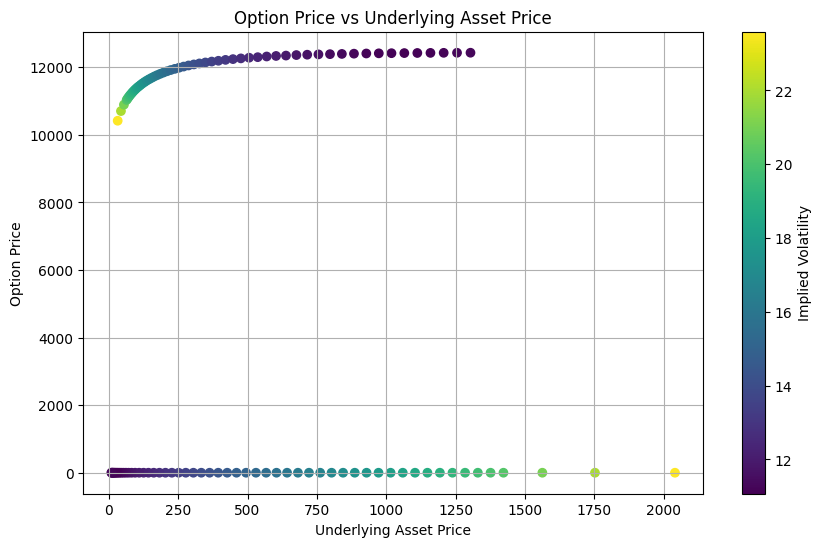

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['CF_CLOSE'], df['FOURIER_PRICE'], c=df['IMP_VOLT'], cmap='viridis')
plt.colorbar(label='Implied Volatility')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')
plt.title('Option Price vs Underlying Asset Price')
plt.grid(True)
plt.show()

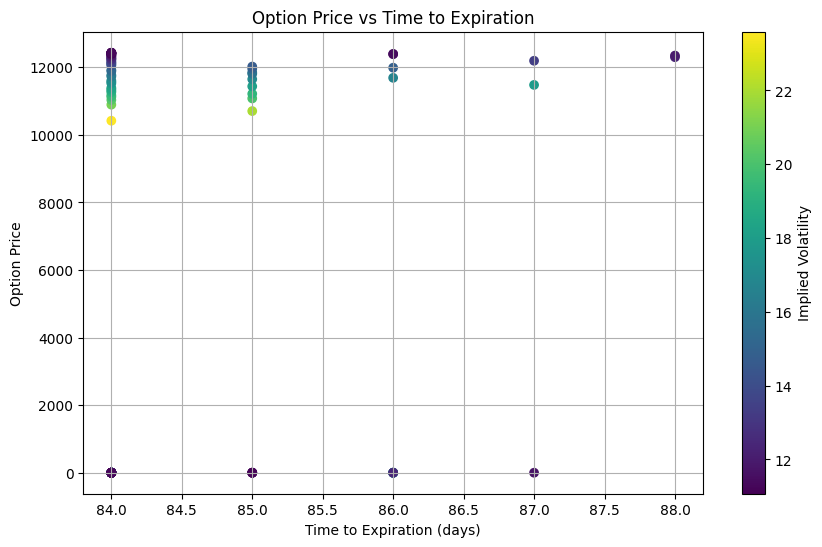

In [29]:
import matplotlib.pyplot as plt

# Calculate Time to Expiration in Days
df['TIME_TO_EXPIRATION'] = (pd.to_datetime(df['EXPIR_DATE']) - pd.to_datetime(df['CF_DATE'])).dt.days

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['TIME_TO_EXPIRATION'], df['FOURIER_PRICE'], c=df['IMP_VOLT'], cmap='viridis')
plt.xlabel('Time to Expiration (days)')
plt.ylabel('Option Price')
plt.title('Option Price vs Time to Expiration')
plt.colorbar(scatter, label='Implied Volatility')
plt.grid(True)
plt.show()

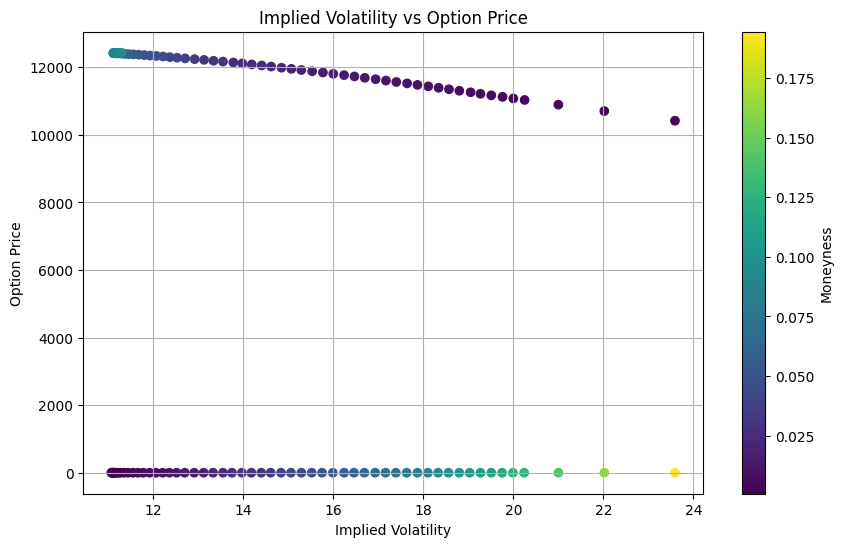

In [22]:
# scatter plot of implied volatility vs option price colored by moneyness

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['IMP_VOLT'], df['FOURIER_PRICE'], c = df['CF_CLOSE'] / df['STRIKE_PRC'], cmap='viridis')
plt.colorbar(label='Moneyness')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Price')
plt.title('Implied Volatility vs Option Price')
plt.grid(True)
plt.show()

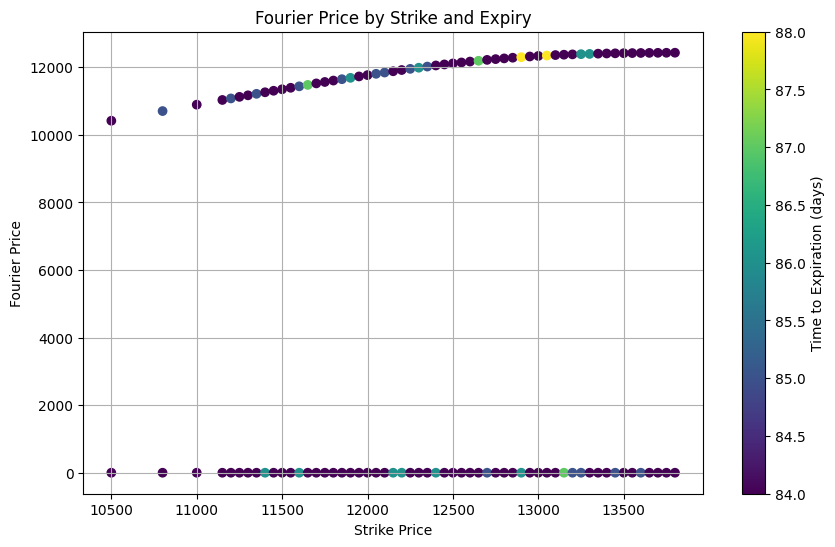

In [34]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['STRIKE_PRC'], df['FOURIER_PRICE'], c=df['TIME_TO_EXPIRATION'], cmap='viridis')
plt.xlabel('Strike Price')
plt.ylabel('Fourier Price')
plt.title('Fourier Price by Strike and Expiry')
plt.colorbar(scatter, label='Time to Expiration (days)')
plt.grid(True)
plt.show()

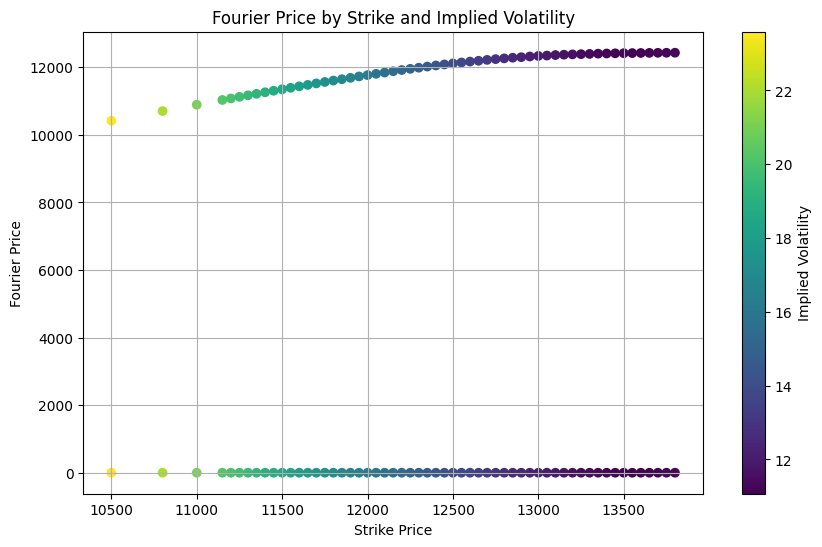

In [32]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['STRIKE_PRC'], df['FOURIER_PRICE'], c=df['IMP_VOLT'], cmap='viridis')
plt.xlabel('Strike Price')
plt.ylabel('Fourier Price')
plt.title('Fourier Price by Strike and Implied Volatility')
plt.colorbar(scatter, label='Implied Volatility')
plt.grid(True)
plt.show()

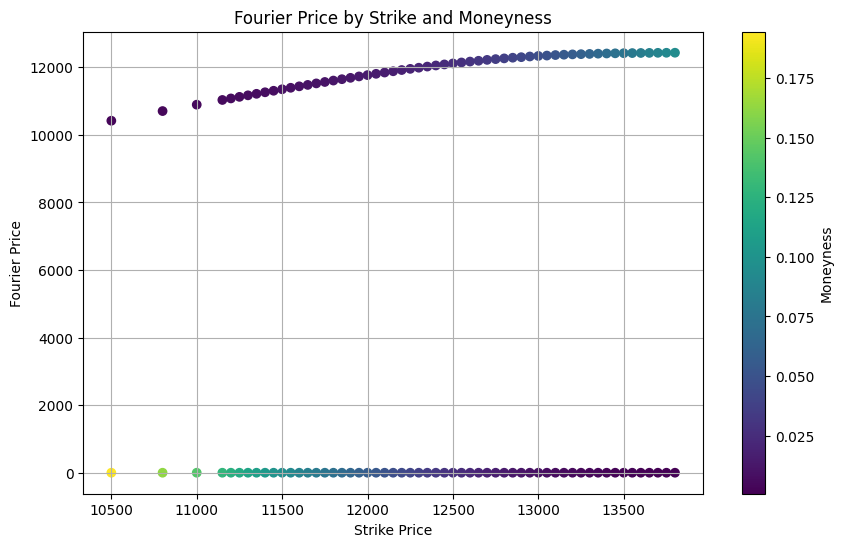

In [33]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['STRIKE_PRC'], df['FOURIER_PRICE'], c = df['CF_CLOSE'] / df['STRIKE_PRC']  # This is just one way to define moneyness
, cmap='viridis')
plt.xlabel('Strike Price')
plt.ylabel('Fourier Price')
plt.title('Fourier Price by Strike and Moneyness')
plt.colorbar(scatter, label='Moneyness')
plt.grid(True)
plt.show()

<ipython-input-44-999329866a04>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  scatter.figure.colorbar(sm)


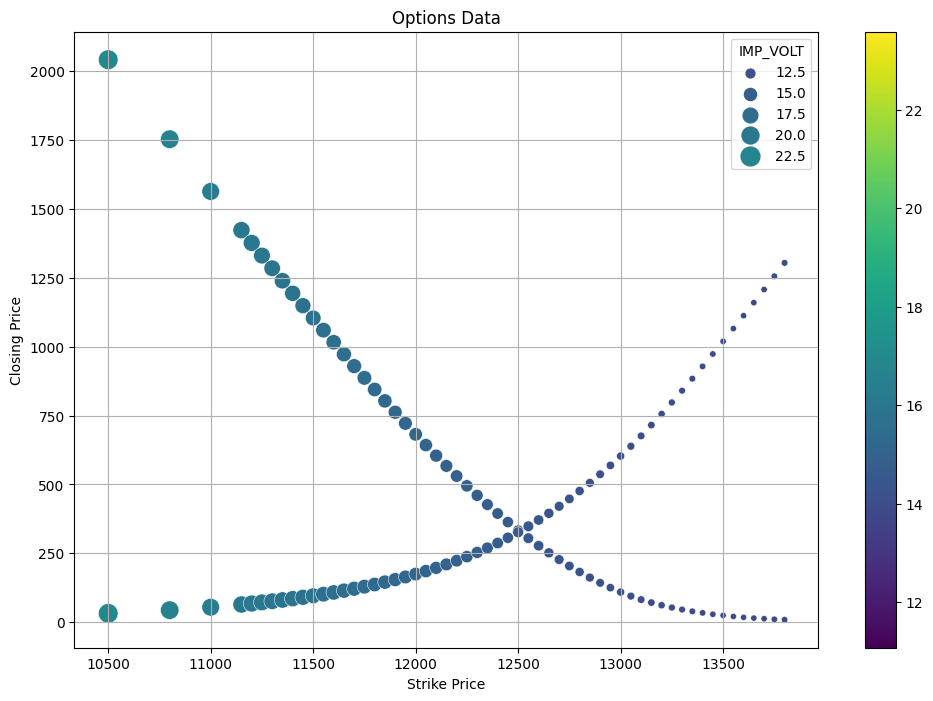

In [44]:
# Filter out rows where PUTCALLIND is not null
options_data = df[~df['PUTCALLIND'].isnull()]

# Create scatterplot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=options_data, x='STRIKE_PRC', y='CF_CLOSE', hue='IMP_VOLT', size='IMP_VOLT', sizes=(20, 200), palette='viridis', hue_norm=(0, 50))

# Adding colorbar
norm = plt.Normalize(df['IMP_VOLT'].min(), df['IMP_VOLT'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
scatter.figure.colorbar(sm)

plt.xlabel('Strike Price')
plt.ylabel('Closing Price')
plt.title('Options Data')
plt.grid(True)
plt.show()